In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Initial Read

We will build a model that will predict `track_popularity` based on the characteristics of each song.   


In [5]:
# df = pd.read_csv('/content/drive/MyDrive/AML Semester Project/spotify_songs.csv')

# Alternatively, you can upload the CSV to the environment
df = pd.read_csv('./spotify_songs.csv')
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Feature Selection

We will now:

1.   Select columns that will be used in our model
2.   Handle missing values in the data
3.   Convert `object` type columns to categorical or numerical
4.   Encode Categorical Features appropriately

## Select Columns


Our target variable is `track_popularity` ranging from `1-100`
We will use the following features:


*   `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

*   `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

*   `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

*   `loudness`: The overall loudness of a track in decibels (dB)

*   `mode`: Mode of the song (major 1 or minor 0)

*   `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

*   `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

*   `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

*   `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

*   `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

*   `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

*   `duration_ms`: The track length in milliseconds

**NOTE**: Key and Mode are categorical features! All the others are continuous features.

All other columns will be dropped. They cannot help us in our task since we would like to see if we can predict a track's popularity soley based on the attributes of the music itself. We do not want to incorporate album name, artist, etc.



In [7]:
# Categorical Features
categorical_feature_names = [
    'key',
    'mode'
]

# Continuous Features
continuous_feature_names = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]

# Target variable
target_name = 'track_popularity'

df = df[continuous_feature_names + categorical_feature_names + [target_name]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32833 non-null  float64
 1   energy            32833 non-null  float64
 2   loudness          32833 non-null  float64
 3   speechiness       32833 non-null  float64
 4   acousticness      32833 non-null  float64
 5   instrumentalness  32833 non-null  float64
 6   liveness          32833 non-null  float64
 7   valence           32833 non-null  float64
 8   tempo             32833 non-null  float64
 9   duration_ms       32833 non-null  int64  
 10  key               32833 non-null  int64  
 11  mode              32833 non-null  int64  
 12  track_popularity  32833 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 3.3 MB


It seems the target variable has values from 1 to 100. We will use Regression techniques to try and estimate popularity for songs based on the attributes of the song.

## Handle Missing Data

In [8]:
df.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
key                 0
mode                0
track_popularity    0
dtype: int64

There are no missing values for any of our datapoints so we do not have to handle missing values.

## Statistics of our dataset

In [9]:
# Continuous features
df.loc[:, continuous_feature_names].describe()

danceability        energy      loudness   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000  32833.000000   
mean       0.654850      0.698619     -6.719499      0.107068      0.175334   
std        0.145085      0.180910      2.988436      0.101314      0.219633   
min        0.000000      0.000175    -46.448000      0.000000      0.000000   
25%        0.563000      0.581000     -8.171000      0.041000      0.015100   
50%        0.672000      0.721000     -6.166000      0.062500      0.080400   
75%        0.761000      0.840000     -4.645000      0.132000      0.255000   
max        0.983000      1.000000      1.275000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [10]:
# Categorical features
df.loc[:, categorical_feature_names].describe()

key          mode
count  32833.000000  32833.000000
mean       5.374471      0.565711
std        3.611657      0.495671
min        0.000000      0.000000
25%        2.000000      0.000000
50%        6.000000      1.000000
75%        9.000000      1.000000
max       11.000000      1.000000

# Exploratory Data Analysis

## Target variable analysis

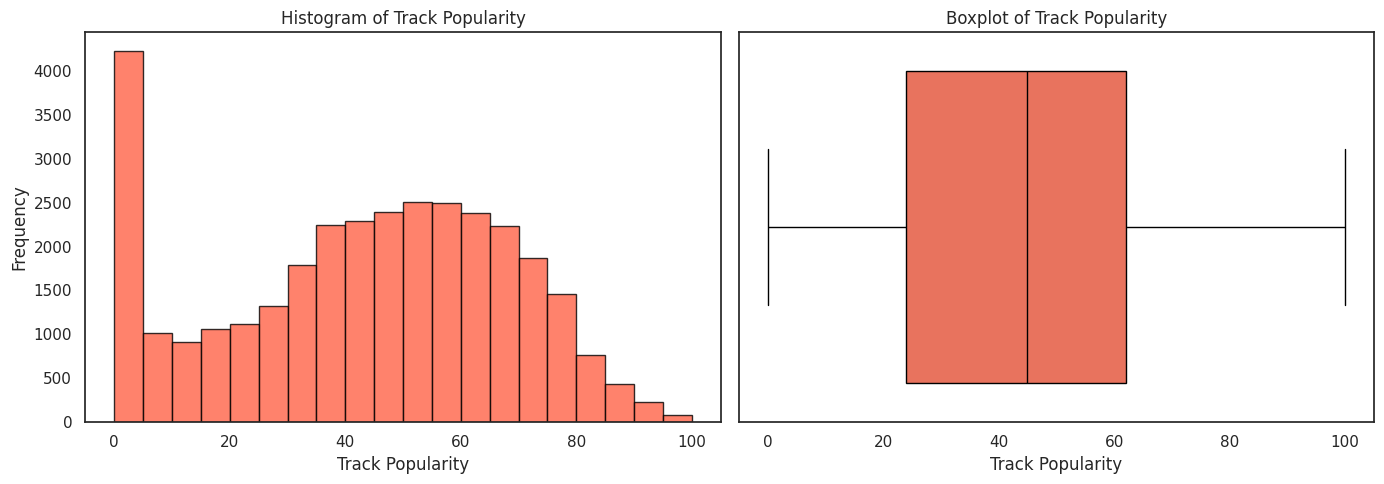

In [11]:
sns.set_theme(style='white')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['track_popularity'], bins=20, edgecolor='black', color='tomato', alpha=0.8)
axes[0].set_xlabel('Track Popularity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Track Popularity')

# Box Plot
q1 = np.quantile(df['track_popularity'], 0.25)
q3 = np.quantile(df['track_popularity'], 0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
sns.boxplot(x=df['track_popularity'],  ax=axes[1], color='tomato', linecolor='black')
axes[1].set_xlabel('Track Popularity')
axes[1].set_title('Boxplot of Track Popularity')

plt.tight_layout()
plt.show()

In [12]:
print(f"BOX PLOT:")
print(f"Whisker Lower Bound: {lower_bound}")
print(f"Whisker Upper Bound: {upper_bound}")

BOX PLOT:
Whisker Lower Bound: -33.0
Whisker Upper Bound: 119.0


* We can see that there are no outliers!
* Track popularity is skewed, with many songs concentrated around lower popularity scores (around 20-40), suggesting that a substantial number of songs have lower popularity.

## Feature Distributions

### Continuous Features

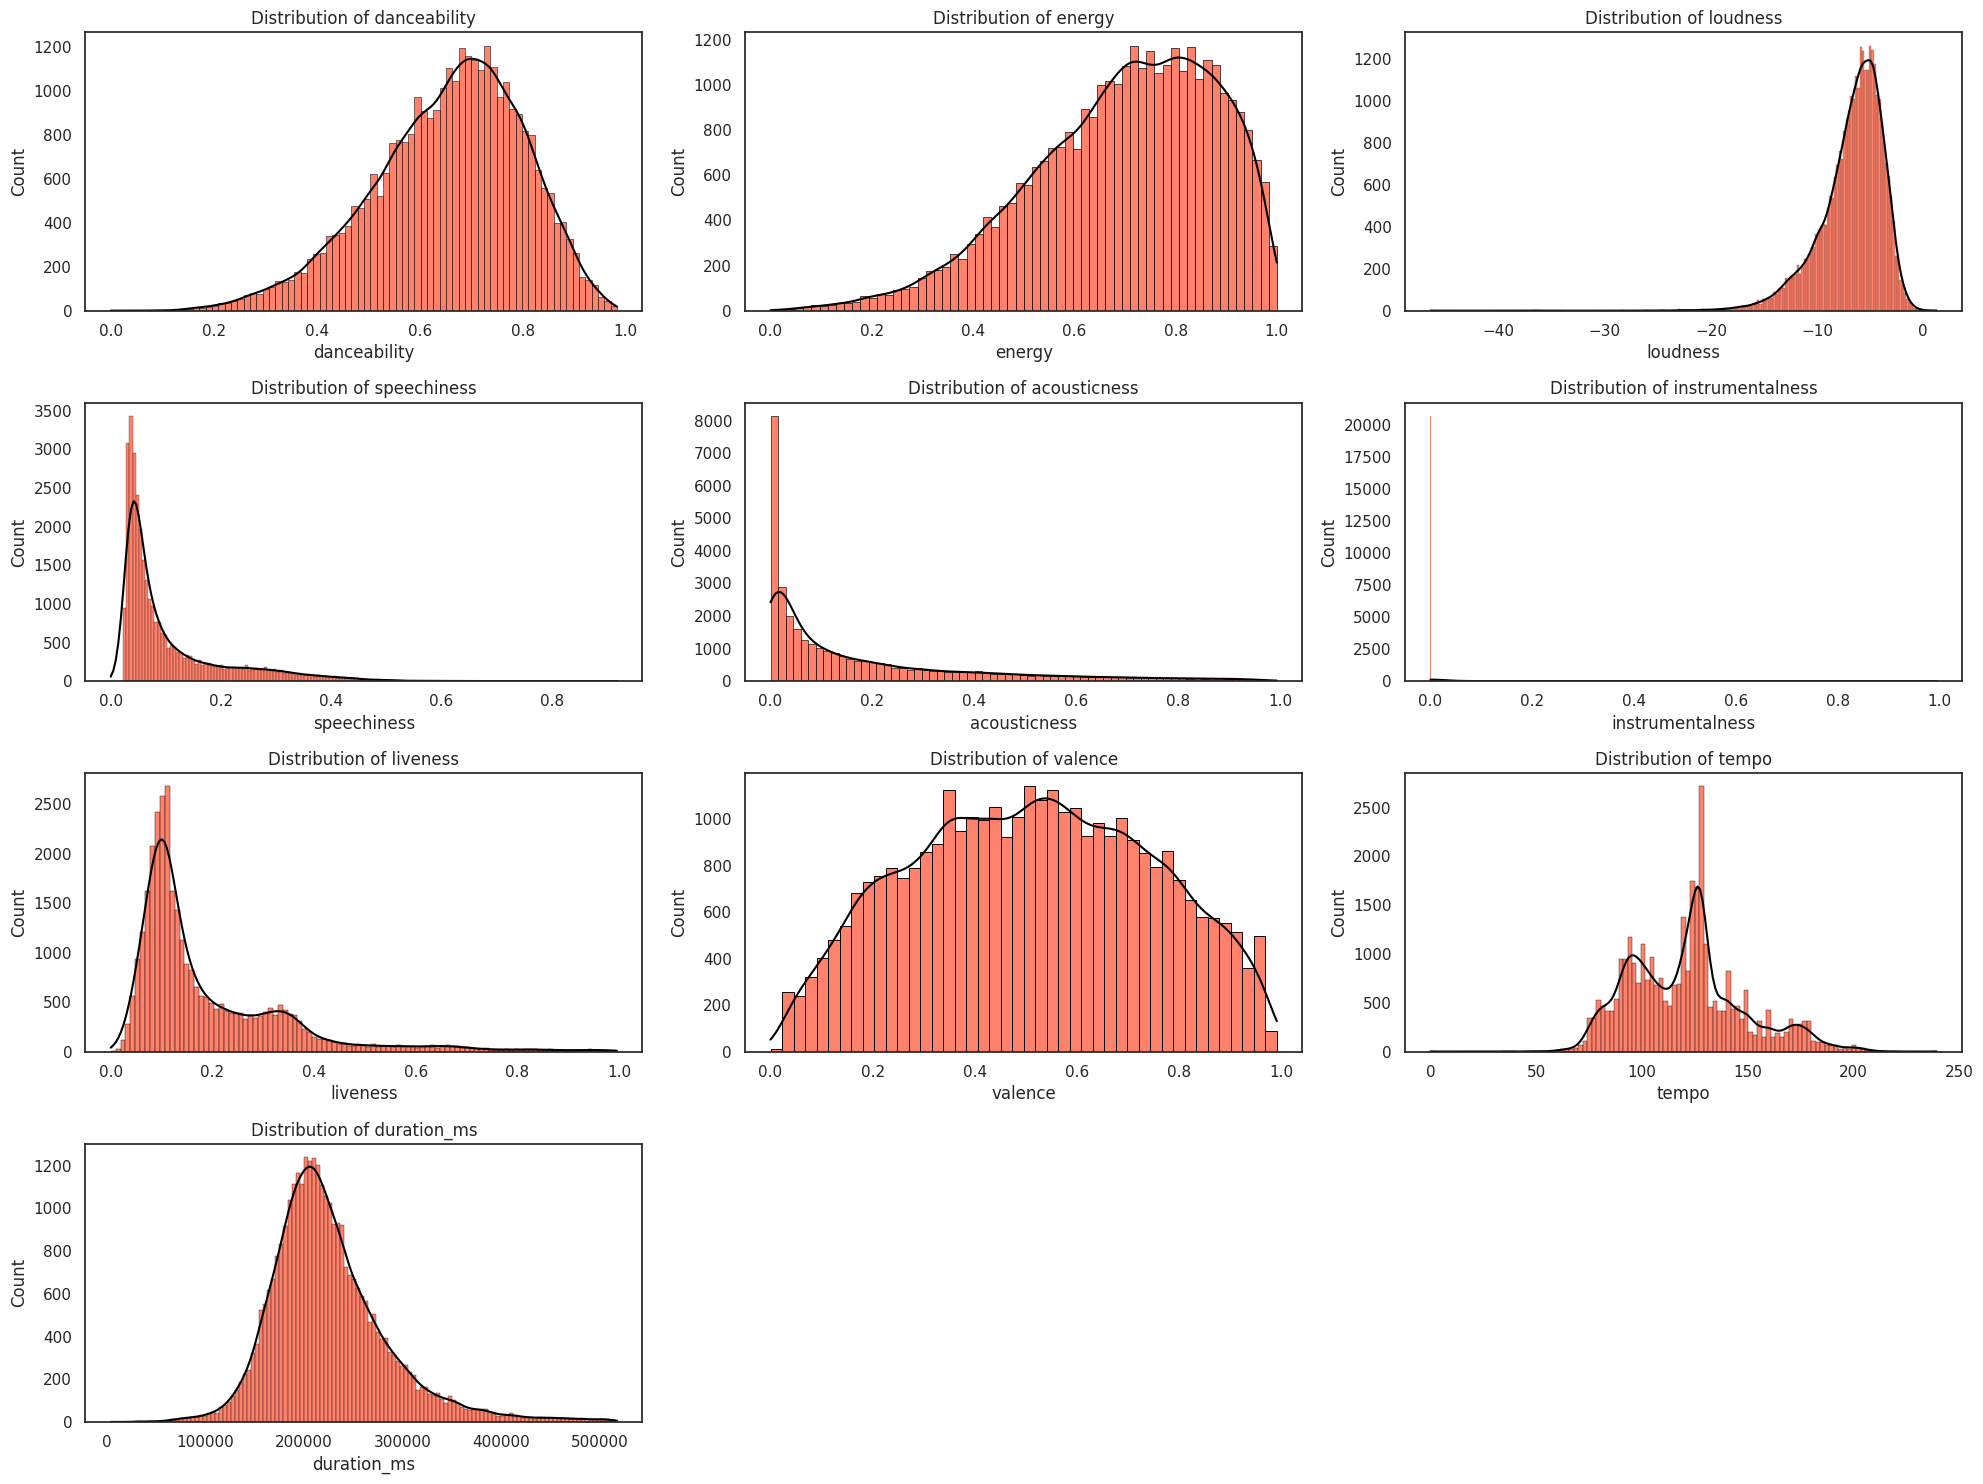

In [13]:
# Histograms for each continuous feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(continuous_feature_names):
  plt.subplot(4, 3, i + 1)
  ax = sns.histplot(df[feature], kde=True, color='tomato', alpha=0.8, edgecolor='black')
  ax.lines[0].set_color('black')
  plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Categorical Features

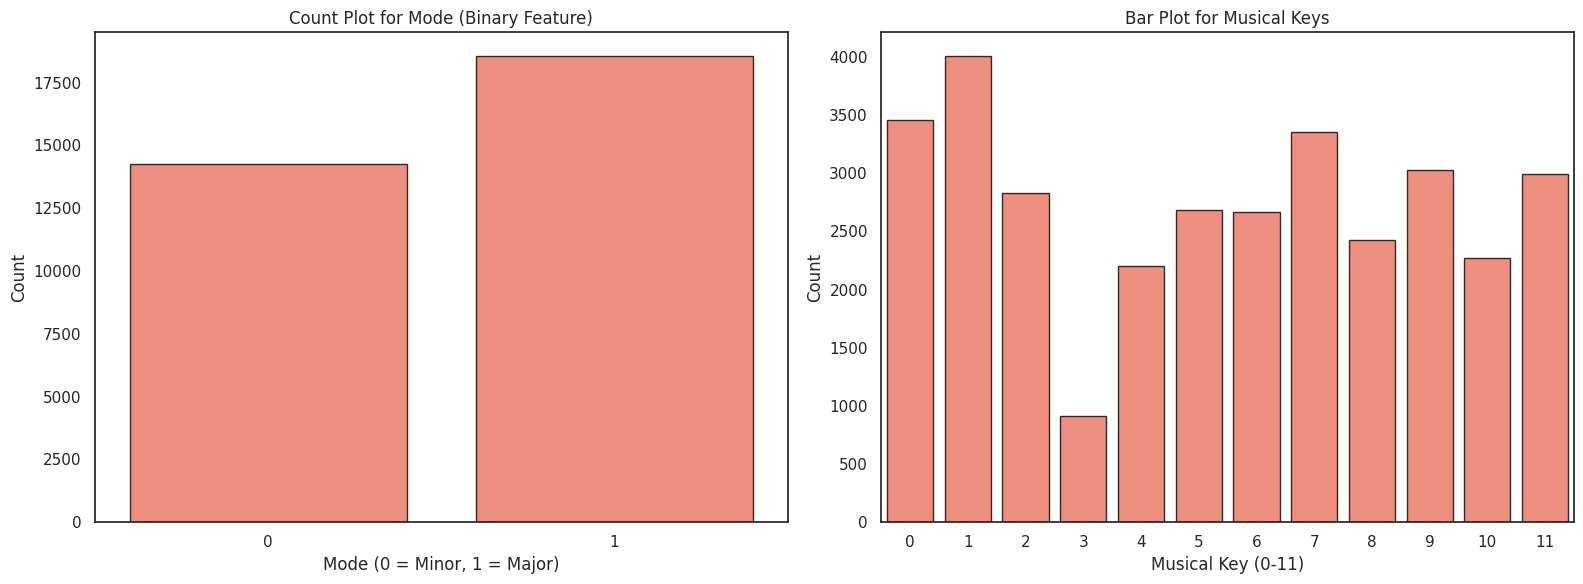

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count Plot for 'mode' (subplot 1)
sns.countplot(x='mode', data=df, ax=axes[0], edgecolor='black', color='tomato', alpha=0.8)
axes[0].set_xlabel('Mode (0 = Minor, 1 = Major)')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot for Mode (Binary Feature)')

# Bar Plot for 'key' (subplot 2)
sns.countplot(x='key', data=df, ax=axes[1], edgecolor='black', color='tomato', alpha=0.8)
axes[1].set_xlabel('Musical Key (0-11)')
axes[1].set_ylabel('Count')
axes[1].set_title('Bar Plot for Musical Keys')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

#### Some Observations -


- Danceability and energy both show a roughly normal distribution, peaking around 0.7, indicating that most tracks have moderate to high levels of these attributes.

- Key is almost uniformly distributed across different values, suggesting no particular key is predominant but key 3 significantly low as compared to others.

- Loudness shows a skewed distribution with most tracks around -10 dB.

- Mode is predominantly 1, indicating a preference for major keys.

- Speechiness, instrumentalness, and liveness are skewed towards lower values, showing that most tracks are not heavily speech-based or instrumental and have low live performance elements.

- Acousticness also skews low, suggesting most tracks are not acoustic.

- Valence has a broad distribution, indicating a wide range of emotional content in the tracks.

- Tempo shows peaks around common tempos but varies widely.
Duration (ms) is normally distributed around typical song lengths.

## Target - Feature analysis

### Continuous Features

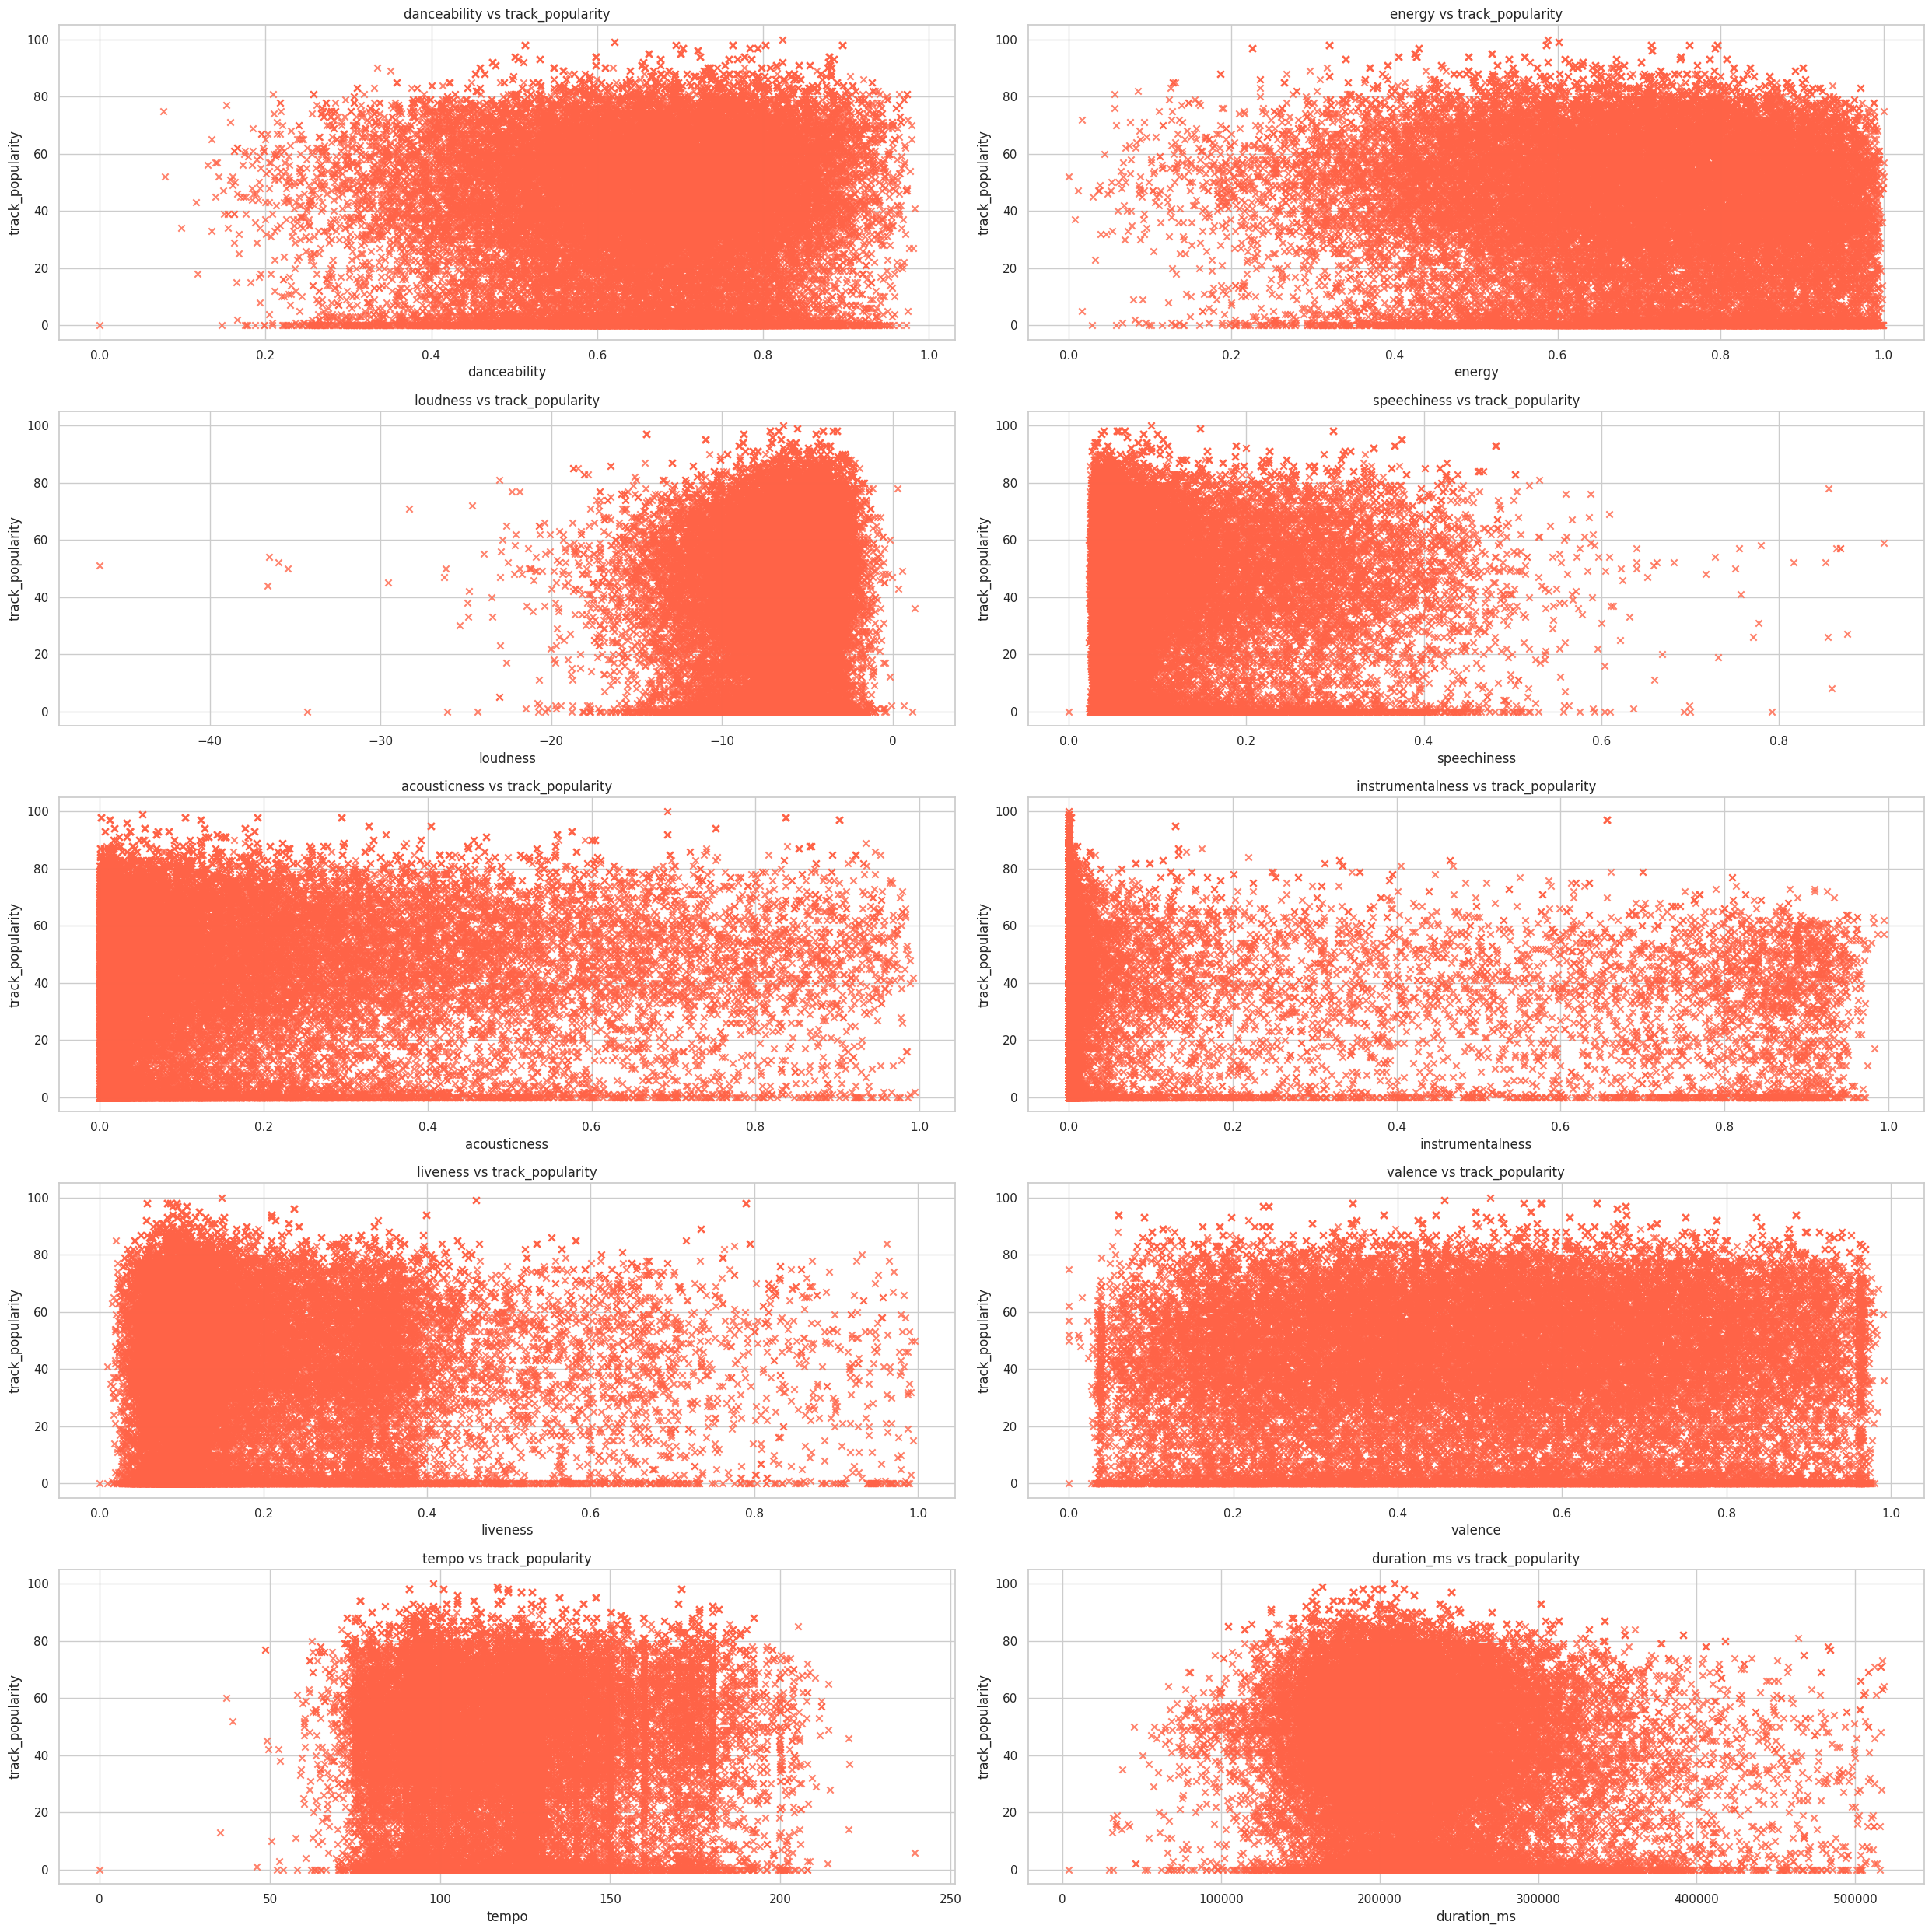

In [15]:
sns.set_theme(style='whitegrid')
figure, axis = plt.subplots(5, 2, figsize=(25, 25))
axis = axis.flatten()
for i, feature in enumerate(continuous_feature_names):
    axis[i].scatter(df[feature], df[target_name], alpha=0.8, marker='x', color='tomato')
    axis[i].set_title(f'{feature} vs {target_name}')
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel(target_name)
    axis[i].grid(True)

plt.tight_layout()
plt.show()

### Categorical Features

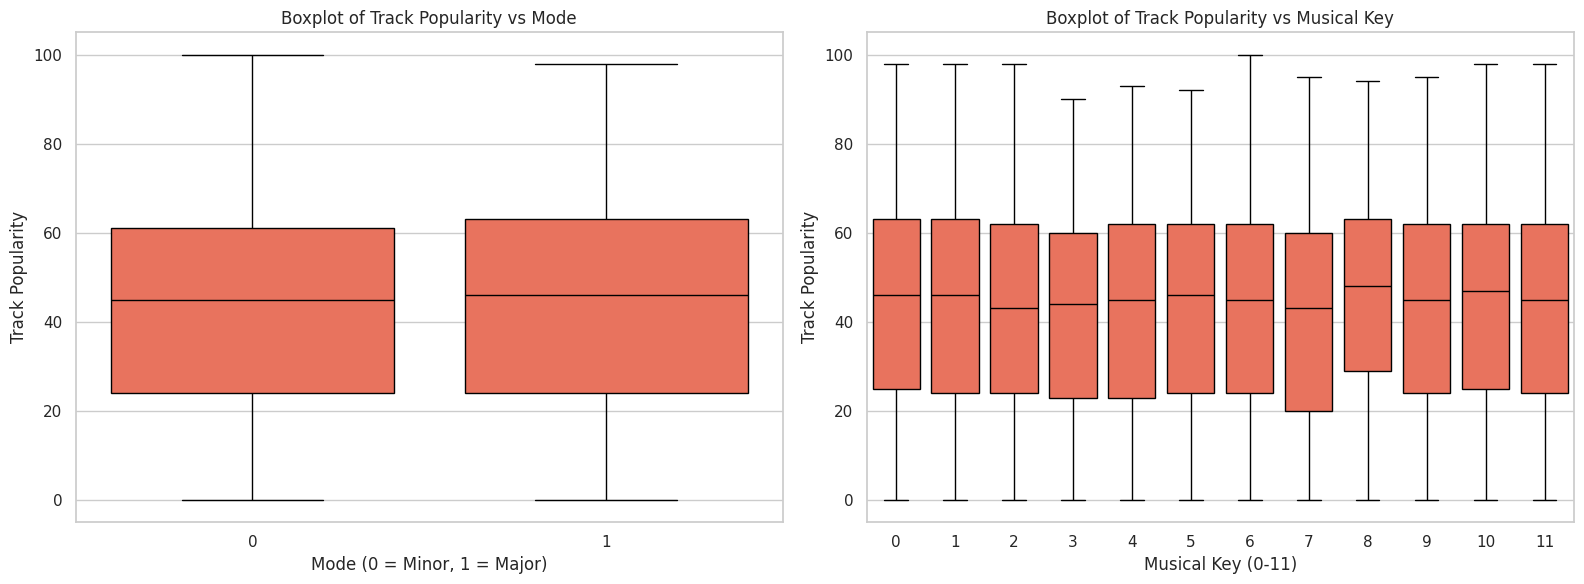

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for 'track_popularity' vs 'mode' (subplot 1)
sns.boxplot(x='mode', y='track_popularity', data=df, ax=axes[0], linecolor='black', color='tomato')
axes[0].set_xlabel('Mode (0 = Minor, 1 = Major)')
axes[0].set_ylabel('Track Popularity')
axes[0].set_title('Boxplot of Track Popularity vs Mode')

# Boxplot for 'track_popularity' vs 'key' (subplot 2)
sns.boxplot(x='key', y='track_popularity', data=df, ax=axes[1], linecolor='black', color='tomato')
axes[1].set_xlabel('Musical Key (0-11)')
axes[1].set_ylabel('Track Popularity')
axes[1].set_title('Boxplot of Track Popularity vs Musical Key')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

## Feature Relationships

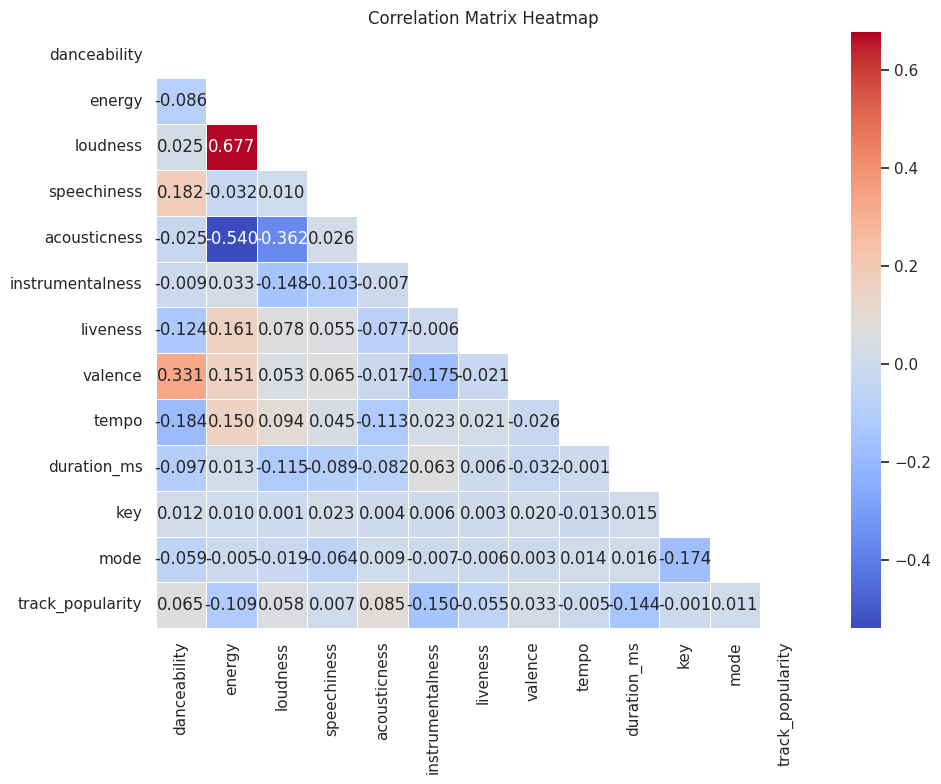

In [17]:
feature_names = continuous_feature_names + categorical_feature_names
corr_matrix = df.corr()
mask = np.triu(corr_matrix)

sns.set_theme(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Based on the correlation matrix, there are no features that are too highly correlated with each other. `Energy` and `Loudness` are semicorrelated with each other, however the correlation is not too high that we would need to drop one of the columns.   

There may be a risk of multi-colliniarity with these columns, we will have to do further investigation to see if this is the case.

# Data Preprocessing

## One-Hot encoding for categorical features

In [18]:
# Preprocessing categorical features
categorical_X = df[categorical_feature_names]
key_one_hot = pd.get_dummies(df['key'], prefix='key').astype(int)
categorical_X = pd.concat([categorical_X, key_one_hot], axis=1)
categorical_X.drop('key', axis=1, inplace=True)

In [19]:
X = pd.concat([df[continuous_feature_names], categorical_X], axis=1)
y = df[target_name]

## Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split
dev_X, test_X, dev_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(dev_X, dev_y, test_size=0.25, random_state=42)

## Standardize Continuous Features

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
print(continuous_feature_names)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [23]:
# Standardize continuous features
dev_X[continuous_feature_names] = scaler.fit_transform(dev_X[continuous_feature_names])
train_X[continuous_feature_names] = scaler.fit_transform(train_X[continuous_feature_names])
val_X[continuous_feature_names] = scaler.transform(val_X[continuous_feature_names])
test_X[continuous_feature_names] = scaler.transform(test_X[continuous_feature_names])

## Model Training (Linear Models)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(y_true, y_pred):
  mae = mean_absolute_error(test_y, y_pred)
  mse = mean_squared_error(test_y, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, y_pred)

  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"R²: {r2:.2f}")


In [25]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title(f"Actual vs Predicted Values for {model_name}")
  plt.grid()
  plt.show()

In [26]:
def sigmoid_scale(prediction):
  return np.int64(np.floor(100 * (1 / ((1 + np.exp(-prediction))))))

-- LINEAR REGRESSION METRICS --
Score: 0.07162960973093846
MAE: 20.07
MSE: 576.45
RMSE: 24.01
R²: 0.07


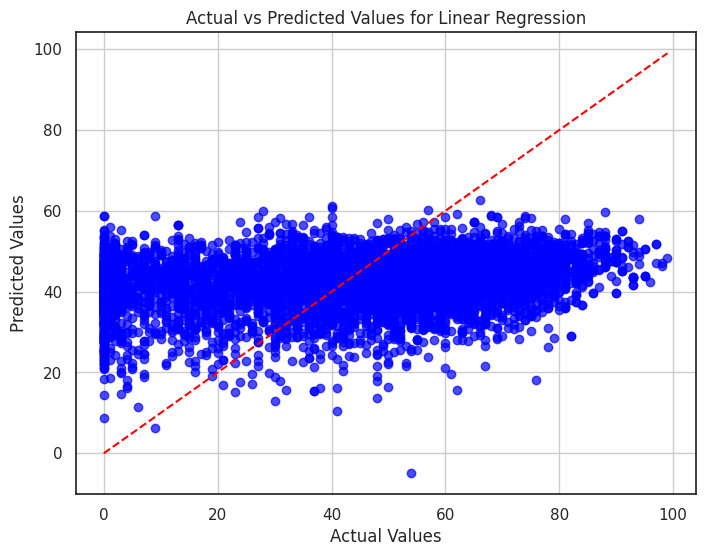

In [27]:
# Linear Regression - Reference Source: https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

linear_regression_model = LinearRegression()
linear_regression_model.fit(dev_X, dev_y)

y_pred_linear_regression = linear_regression_model.predict(test_X)

print("-- LINEAR REGRESSION METRICS --")
print("Score:", linear_regression_model.score(test_X, test_y))

evaluate_model(test_y, y_pred_linear_regression)
plot_actual_vs_predicted(test_y, y_pred_linear_regression, "Linear Regression")

-- LASSO METRICS --
Best alpha: 0.04832930238571752
Best score: -580.2879176103767
MAE: 20.08
MSE: 576.76
RMSE: 24.02
R²: 0.07


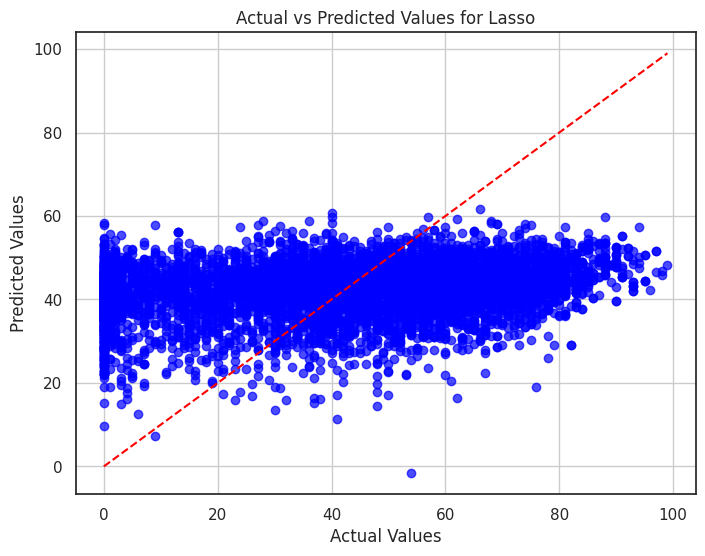

In [28]:
# Lasso Regression - Reference Source: https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Lasso.html
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

lasso_model = linear_model.Lasso(random_state=42)
param_grid_lasso = {'alpha': np.logspace(-5, 5, 20)}

grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(dev_X, dev_y)
best_lasso_model = grid_search_lasso.best_estimator_

y_pred_lasso = best_lasso_model.predict(test_X)

print("-- LASSO METRICS --")
print("Best alpha:", grid_search_lasso.best_params_['alpha'])
print("Best score:", grid_search_lasso.best_score_)

evaluate_model(test_y, y_pred_lasso)
plot_actual_vs_predicted(test_y, y_pred_lasso, "Lasso")

-- RIDGE METRICS --
Best alpha: 215.44346900318823
Best score: -580.42493799211
MAE: 20.07
MSE: 576.52
RMSE: 24.01
R²: 0.07


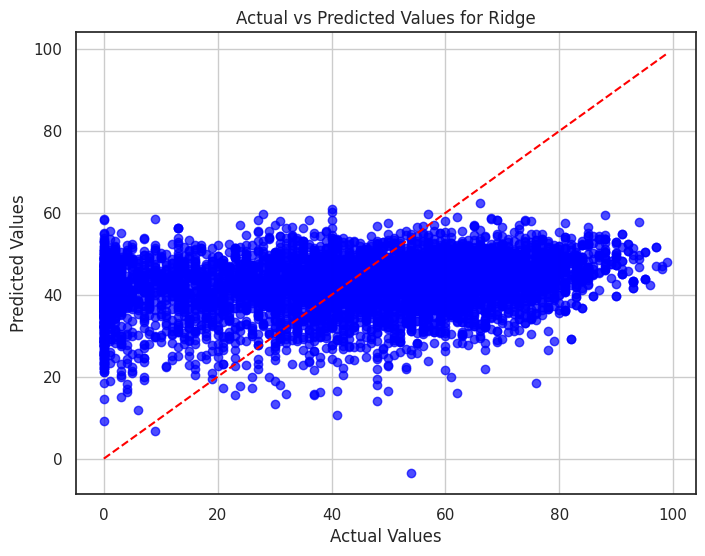

In [29]:
# Ridge Regression - Reference Source: https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state=42)
param_grid_ridge = {'alpha': np.logspace(-3, 3, 10)}

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(dev_X, dev_y)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(test_X)

print("-- RIDGE METRICS --")
print("Best alpha:", grid_search_ridge.best_params_['alpha'])
print("Best score:", grid_search_ridge.best_score_)
evaluate_model(test_y, y_pred_ridge)
plot_actual_vs_predicted(test_y, y_pred_ridge, "Ridge")

-- ELASTIC METRICS --
Best alpha: 0.046415888336127774
Best l1_ratio: 1.0
Best score: -580.2881212630344
MAE: 20.08
MSE: 576.75
RMSE: 24.02
R²: 0.07


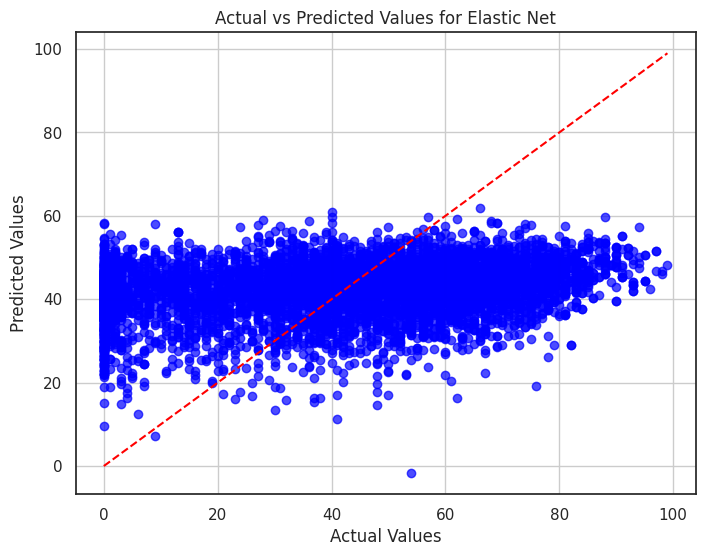

In [30]:
# ElasticNet - Reference Source: https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNet.html
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

elasticnet_model = ElasticNet(random_state=42)
param_grid_elastic = {
    'alpha': np.logspace(-4, 4, 10),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}
grid_search_elastic = GridSearchCV(elasticnet_model, param_grid_elastic, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic.fit(dev_X, dev_y)

best_elastic = grid_search_elastic.best_estimator_
y_pred_elastic = best_elastic.predict(test_X)

print("-- ELASTIC METRICS --")
print("Best alpha:", grid_search_elastic.best_params_['alpha'])
print("Best l1_ratio:", grid_search_elastic.best_params_['l1_ratio'])
print("Best score:", grid_search_elastic.best_score_)
evaluate_model(test_y, y_pred_elastic)
plot_actual_vs_predicted(test_y, y_pred_elastic, "Elastic Net")

## Model Training (Tree Models)

-- ADABOOST METRICS --
MAE: 20.18
MSE: 569.94
RMSE: 23.87
R²: 0.08


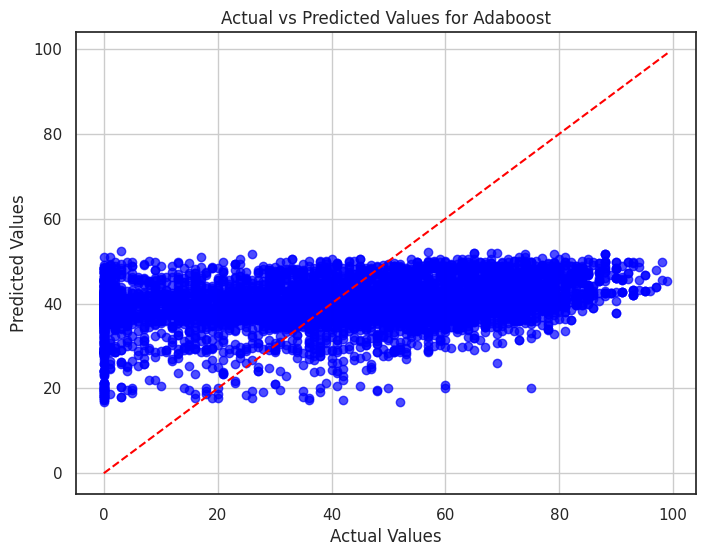

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# param_dist = {
#     'n_estimators': np.arange(50, 200, 50),  # Random range of values
#     'learning_rate': np.logspace(-2, 0, 5),  # Sample learning rates
#     'estimator__max_depth': [2, 3, 5]
# }

# base_estimator = DecisionTreeRegressor(random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=AdaBoostRegressor(estimator=base_estimator, random_state=42),
#     param_distributions=param_dist,
#     n_iter=10,  # Number of random combinations to evaluate
#     cv=3,
#     scoring='neg_mean_squared_error',
#     verbose=1,
#     random_state=42
# )
# random_search.fit(dev_X, dev_y)

# print("Best Parameters:", random_search.best_params_)
# best_adaboost = random_search.best_estimator_

adaboost_regressor = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
    n_estimators=150,
    learning_rate=0.03,
    random_state=42
)

y_pred_adaboost = adaboost_regressor.fit(dev_X, dev_y).predict(test_X)

print("-- ADABOOST METRICS --")
evaluate_model(test_y, y_pred_adaboost)
plot_actual_vs_predicted(test_y, y_pred_adaboost, "Adaboost")

-- LIGHTGBM METRICS --
MAE: 19.50
MSE: 535.37
RMSE: 23.14
R²: 0.14


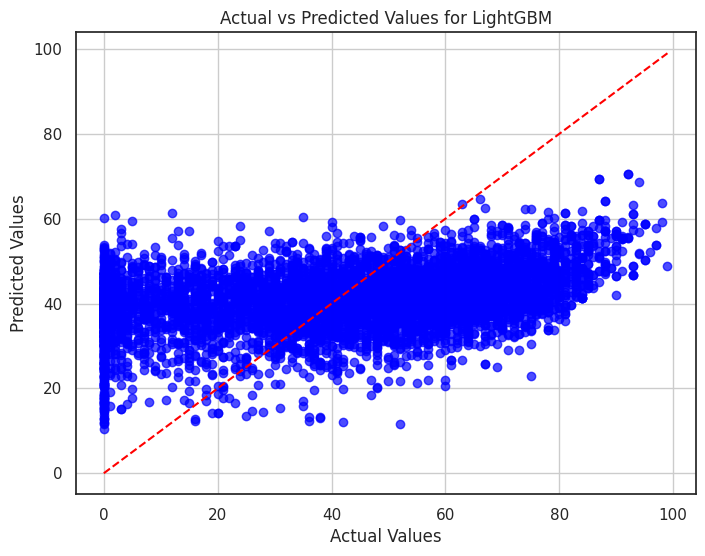

In [32]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# # Expanded and more targeted hyperparameter search space
# param_dist = {
#     'n_estimators': np.arange(50, 500, 50),  # Broader range of estimators
#     'learning_rate': np.logspace(-3, -1, 10),  # More learning rate options
#     'max_depth': [3, 5, 7, 10, 12, -1],  # Additional depth options
#     'num_leaves': [20, 31, 50, 70, 100],  # More leaf options
#     'min_child_samples': [5, 10, 20, 30, 50],  # Refined child sample range
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # More subsampling options
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Feature sampling options
#     'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
#     'reg_lambda': [0, 0.1, 0.5, 1]  # L2 regularization
# }

# # Initialize base LightGBM model
# lgbm = LGBMRegressor(random_state=42)

# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_dist,
#     n_iter=50,  # Number of random combinations to try
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_squared_error',
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit the random search
# random_search.fit(dev_X, dev_y)

# # Print and use the best parameters
# print("Best Parameters:", random_search.best_params_)

best_params = {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0,
               'num_leaves': 70, 'n_estimators': 450, 'min_child_samples': 30,
               'max_depth': 12, 'learning_rate': 0.01,'colsample_bytree': 0.7}


# Create the best model with optimal hyperparameters
best_lgbm = LGBMRegressor(random_state=42, **best_params, verbose=-1)

# Fit and predict
y_pred_lgbm = best_lgbm.fit(dev_X, dev_y).predict(test_X)

# Evaluation
print("-- LIGHTGBM METRICS --")
evaluate_model(test_y, y_pred_lgbm)
plot_actual_vs_predicted(test_y, y_pred_lgbm, "LightGBM")

-- XGBOOST METRICS --
MAE: 18.30
MSE: 484.82
RMSE: 22.02
R²: 0.22


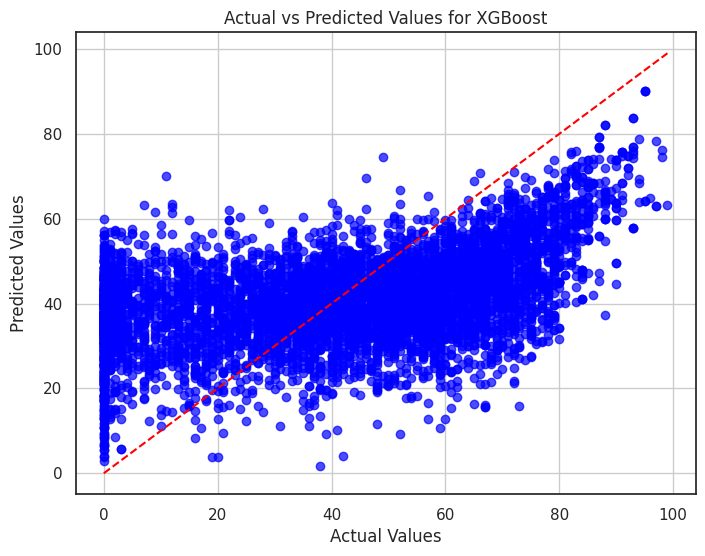

In [33]:
# XGBoost
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# param_distributions = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'n_estimators': [100, 200, 500],
#     'max_depth': [3, 5, 7, 10],
#     'min_child_weight': [1, 3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 5, 10]
# }

# xgb_model = xgb.XGBRegressor(
#     random_state=42,
#     objective='reg:squarederror',
#     verbosity=0
# )

# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings sampled
#     cv=3,
#     scoring='neg_mean_squared_error',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(dev_X, dev_y)

# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

xgboost_model = xgb.XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    verbosity=0,
    subsample=1.0,
    reg_lambda=10,
    reg_alpha=0.1,
    n_estimators=200,
    min_child_weight=1,
    max_depth=10,
    learning_rate=0.1,
    gamma=1,
    colsample_bytree=0.6
)
xgboost_model.fit(dev_X, dev_y)
y_pred_xgboost = xgboost_model.predict(test_X)

print("-- XGBOOST METRICS --")
evaluate_model(test_y, y_pred_xgboost)
plot_actual_vs_predicted(test_y, y_pred_xgboost, "XGBoost")

In [34]:
!pip install catboost

-- BEST CATBOOST METRICS --
MAE: 19.00
MSE: 514.16
RMSE: 22.68
R²: 0.17


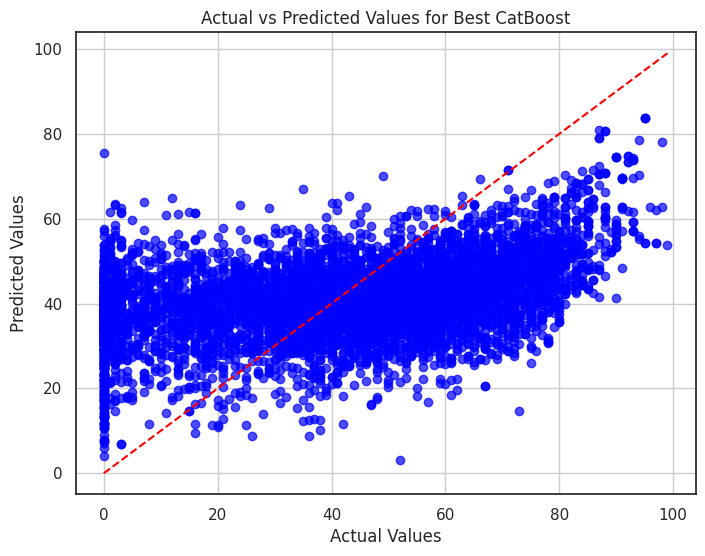

In [35]:
# CatBoost
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# param_grid_catboost = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'iterations': [100, 300, 500],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'min_data_in_leaf': [1, 5, 10, 15],
#     'border_count': [32, 64, 128, 255],
#     'bagging_temperature': [0, 0.1, 0.2, 0.5],
#     'subsample': [0.6, 0.8, 1.0]
# }

# catboost_model = CatBoostRegressor(
#     random_seed=42,
#     verbose=0
# )

# grid_search_catboost = GridSearchCV(
#     estimator=catboost_model,
#     param_grid=param_grid_catboost,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     verbose=2,
#     n_jobs=-1
# )

# grid_search_catboost.fit(dev_X, dev_y)

# print("Best parameters:", grid_search_catboost.best_params_)
# print("Best score:", grid_search_catboost.best_score_)


best_catboost = CatBoostRegressor(
    random_seed=42,
    verbose=0,
    subsample=0.8,
    min_data_in_leaf=1,
    learning_rate=0.05,
    l2_leaf_reg=3,
    iterations=500,
    depth=10,
    border_count=128,
    bagging_temperature=0.5,
)
best_catboost.fit(dev_X, dev_y)
y_pred_best_catboost = best_catboost.predict(test_X)

print("-- BEST CATBOOST METRICS --")
evaluate_model(test_y, y_pred_best_catboost)
plot_actual_vs_predicted(test_y, y_pred_best_catboost, "Best CatBoost")


## Model Training (Deep Learning Models)

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
torch.manual_seed(42)

In [37]:
# Convert Data to Tensors
train_X_tensors = torch.tensor(train_X.to_numpy(), dtype=torch.float32)
train_y_tensors = torch.tensor(train_y.to_numpy(), dtype=torch.float32).view(-1, 1)

val_X_tensors = torch.tensor(val_X.to_numpy(), dtype=torch.float32)
val_y_tensors = torch.tensor(val_y.to_numpy(), dtype=torch.float32).view(-1, 1)

test_X_tensors = torch.tensor(test_X.to_numpy(), dtype=torch.float32)
test_y_tensors = torch.tensor(test_y.to_numpy(), dtype=torch.float32).view(-1, 1)

In [38]:
# Create DataLoader
train_dataset = TensorDataset(train_X_tensors, train_y_tensors)
train_loader = DataLoader(train_dataset, batch_size=2048, shuffle=True)

val_dataset = TensorDataset(val_X_tensors, val_y_tensors)
val_loader = DataLoader(val_dataset, batch_size=2048, shuffle=False)

test_dataset = TensorDataset(test_X_tensors, test_y_tensors)
test_loader = DataLoader(test_dataset, batch_size=2048, shuffle=False)

In [39]:
next(iter(train_loader))[0].size()

torch.Size([2048, 23])

EPOCH [0/500], Train Loss: 2014.1269, Val Loss: 1949.5874
EPOCH [100/500], Train Loss: 542.8859, Val Loss: 570.6612
EPOCH [200/500], Train Loss: 523.3150, Val Loss: 576.3232
EPOCH [300/500], Train Loss: 492.8348, Val Loss: 548.6441
EPOCH [400/500], Train Loss: 483.2695, Val Loss: 566.1126
Test Loss: 565.2148

-- DENSE NN (WITH DROPOUT) METRICS --
MAE: 19.53
MSE: 559.19
RMSE: 23.65
R²: 0.10


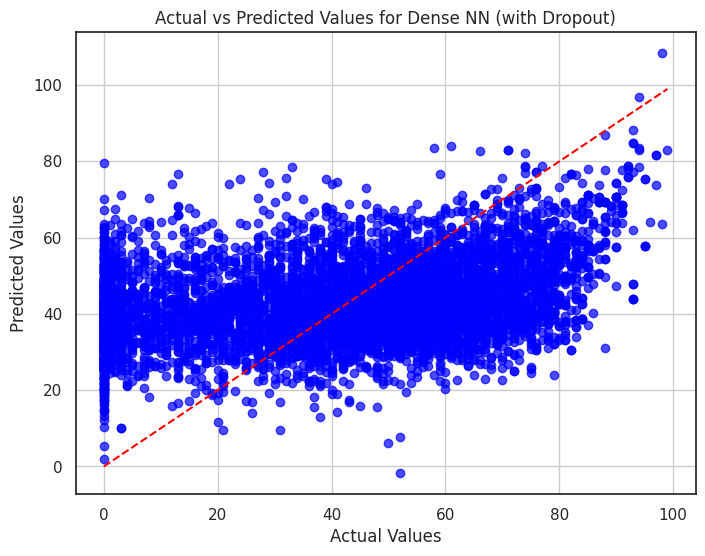

In [40]:
# Dense Neural Network (with Dropout)
class DenseNN(nn.Module):
  def __init__(self, input_dim: int) -> None:
    super().__init__()

    self.layers = nn.Sequential(
      nn.Linear(input_dim, 128),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(128, 32),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(32, 1)
    )

  def forward(self, x):
    return self.layers(x)



# Train
input_dim = train_X.shape[1]
model = DenseNN(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0

  for X, y in train_loader:
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    outputs = model(X)

    loss = criterion(outputs, y)


    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  train_loss = train_loss / len(train_loader)

  model.eval()
  val_loss = 0.0

  with torch.no_grad():
    for X, y in val_loader:
      X, y = X.to(device), y.to(device)
      outputs = model(X)
      loss = criterion(outputs, y)

      val_loss += loss.item()

  val_loss = val_loss / len(val_loader)

  if epoch % 100 == 0:
    print(f"EPOCH [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


# Test
model.eval()
test_loss = 0.0

y_pred = []
y_true = []

with torch.no_grad():
  for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    y_pred.append(outputs.cpu().numpy())
    y_true.append(y.cpu().numpy())

    test_loss += loss.item()

test_loss = test_loss / len(test_loader)
print(f"Test Loss: {test_loss:.4f}")


y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

print("\n-- DENSE NN (WITH DROPOUT) METRICS --")
evaluate_model(y_true, y_pred)
plot_actual_vs_predicted(y_true, y_pred, "Dense NN (with Dropout)")

EPOCH [0/1000], Train Loss: 2503.1629, Val Loss: 2195.0087
EPOCH [100/1000], Train Loss: 556.6502, Val Loss: 560.1425
EPOCH [200/1000], Train Loss: 534.4564, Val Loss: 559.0640
EPOCH [300/1000], Train Loss: 520.0452, Val Loss: 558.5244
EPOCH [400/1000], Train Loss: 511.6169, Val Loss: 557.6631
EPOCH [500/1000], Train Loss: 501.8723, Val Loss: 553.9500
EPOCH [600/1000], Train Loss: 500.7824, Val Loss: 556.7860
EPOCH [700/1000], Train Loss: 487.6741, Val Loss: 558.3389
EPOCH [800/1000], Train Loss: 486.5885, Val Loss: 555.1876
EPOCH [900/1000], Train Loss: 485.4800, Val Loss: 566.9614
Test Loss: 565.7002

-- DENSE NN (WITH BATCH NORMALIZATION) METRICS --
MAE: 19.77
MSE: 559.40
RMSE: 23.65
R²: 0.10


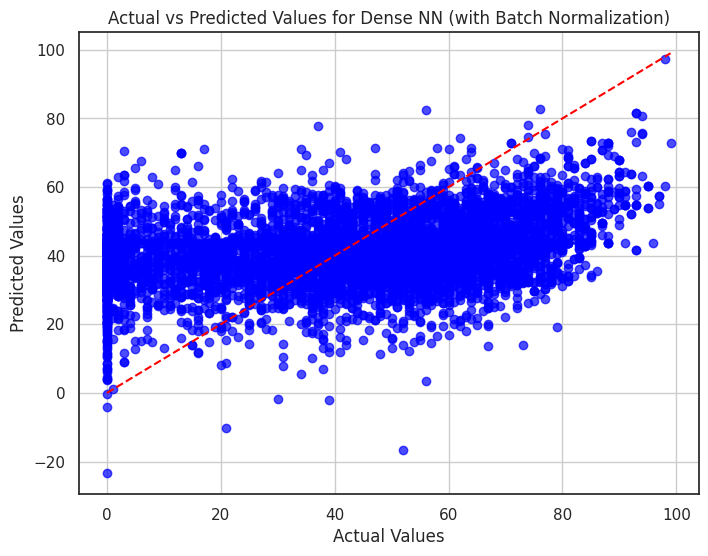

In [41]:
# Dense Neural Network (Batch Normalization)
class DenseNNWithBatchNorm(nn.Module):
  def __init__(self, input_dim: int) -> None:
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(input_dim, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, 32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32, 1)
    )

  def forward(self, x):
    return self.layers(x)



# Train
input_dim = train_X.shape[1]
model = DenseNN(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0

  for X, y in train_loader:
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    outputs = model(X)

    loss = criterion(outputs, y)


    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  train_loss = train_loss / len(train_loader)

  model.eval()
  val_loss = 0.0

  with torch.no_grad():
    for X, y in val_loader:
      X, y = X.to(device), y.to(device)
      outputs = model(X)
      loss = criterion(outputs, y)

      val_loss += loss.item()

  val_loss = val_loss / len(val_loader)

  if epoch % 100 == 0:
    print(f"EPOCH [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


# Test
model.eval()
test_loss = 0.0

y_pred = []
y_true = []

with torch.no_grad():
  for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    y_pred.append(outputs.cpu().numpy())
    y_true.append(y.cpu().numpy())

    test_loss += loss.item()

test_loss = test_loss / len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

print("\n-- DENSE NN (WITH BATCH NORMALIZATION) METRICS --")
evaluate_model(y_true, y_pred)
plot_actual_vs_predicted(y_true, y_pred, "Dense NN (with Batch Normalization)")